<a href="https://colab.research.google.com/github/sitiaisyah14/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Gamma Correction**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


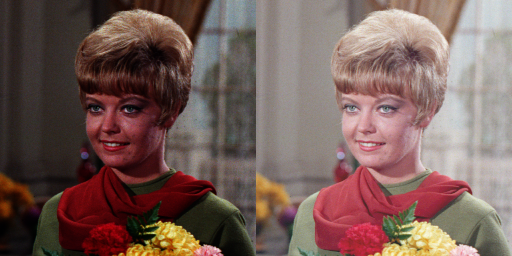

In [4]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gama_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gama_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)),0,255)

final_frame = cv.hconcat((original,gama_image))
cv2_imshow(final_frame)

# **Simulasi Image Depth**

Simulasi Image Depth Pada Citra
-------------------------------
Masukkan nilai bit-depth [1-7]: 2


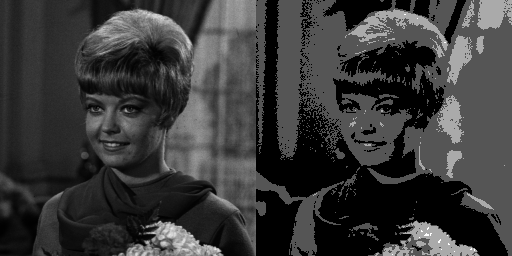

In [10]:
print('Simulasi Image Depth Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
converted_image = np.zeros(original_image.shape, original_image.dtype)


try:
  bitDepth = int(input('Masukkan nilai bit-depth [1-7]: '))
except ValueError:
  print('Error, not a number')


for i in range(original_image.shape[0]):
  for j in range(original_image.shape[1]):
      level = 255 / (pow(2,bitDepth) - 1)
      result = round(original_image[i,j] / level) * level
      converted_image[i,j] = np.clip(result, 0, 255)


result = cv.hconcat((original_image, converted_image))
cv2_imshow(result)

# **Average Denoising**

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 100
Nilai PSNR adalah 19.758317288501708 (dB)
Nilai MSE adalah 687.4618968229167



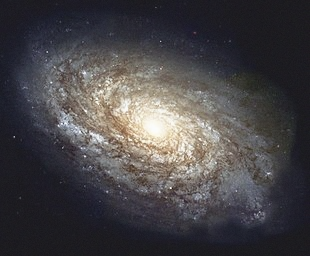

In [84]:
import glob
import math

print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'): 
  n = cv.imread(img)
  cv_img.append(n)


def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra




psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)
print('')
cv2_imshow(noised_image)

# **Image masking (Operator AND)**

Image masking (Operator AND)



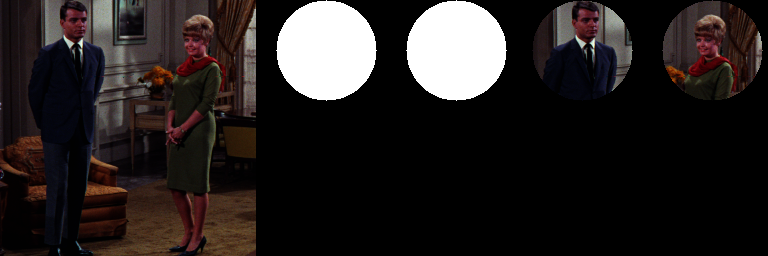

In [63]:
print('Image masking (Operator AND)')
print('')

img_org = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = cv.circle(mask, (200,50), 50, (255,255,255), -1)

result = img_org & mask & mask2

org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)

# **Image masking (Operator OR)**

Image masking (Operator OR)



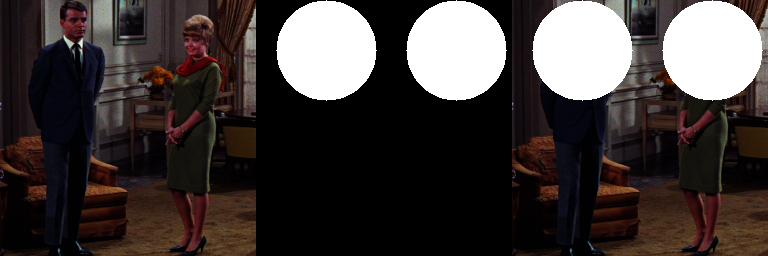

In [67]:
print('Image masking (Operator OR)')
print('')

img_org = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = cv.circle(mask, (200,50), 50, (255,255,255), -1)

result = img_org | mask | mask2

org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)

# **Image masking (Operator NOT)**

Image masking (Operator NOT)



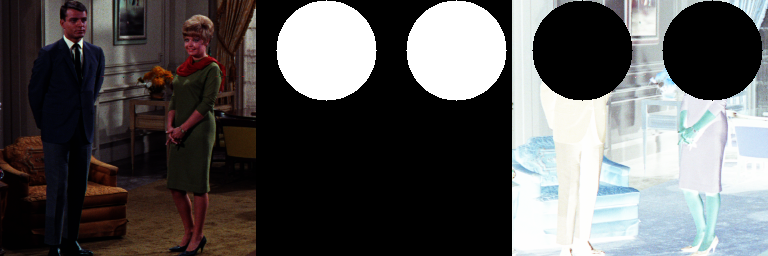

In [72]:
print('Image masking (Operator NOT)')
print('')

img_org = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = cv.circle(mask, (200,50), 50, (255,255,255), -1)

result = ~img_org & ~mask & ~mask2

org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)

# **Image masking (Operator NAND)**

Image masking (Operator NAND)



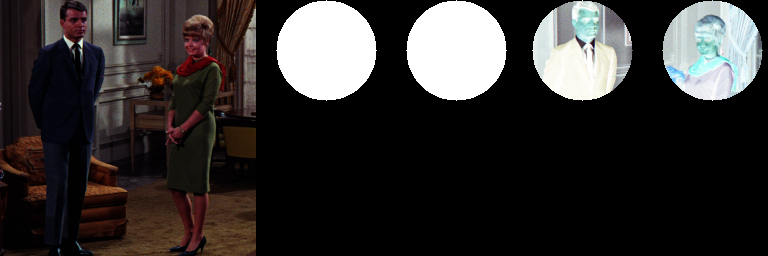

In [76]:
print('Image masking (Operator NAND)')
print('')

img_org = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = cv.circle(mask, (200,50), 50, (255,255,255), -1)

result = ~img_org & mask & mask2

org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)

# **Image masking (Operator XOR)**

Image masking (Operator XOR)



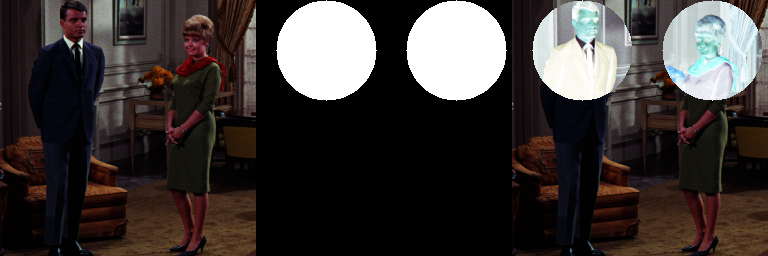

In [77]:
print('Image masking (Operator XOR)')
print('')

img_org = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = cv.circle(mask, (200,50), 50, (255,255,255), -1)

result = img_org ^ mask2

org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)